# MLP OPPE 2 Examination

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.compose import ColumnTransformer

from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay,accuracy_score

In [ ]:
np.random.seed(32)
rs=32

## Que 1

In [1]:
df=pd.read_csv("v1.csv")
df.head()
print(df.shape)
print(df.columns)

NameError: name 'pd' is not defined

## Que 2

Which of the columns in the dataset have null values?

Safety

Evaluation

Lug_boot

Buying

In [ ]:
print(df["Safety"].unique())
print(df["Evaluation"].unique())
print(df["Lug_boot"].unique())
print(df["Buying"].unique())


['low' 'med' 'high']
['unacc' 'acc' 'good' 'vgood']
['small' 'big' 'med']
['vhigh' 'med' 'low' 'high' nan]


In [ ]:
df.Safety.isnull().sum()
df.Lug_boot.isnull().sum()
df.Buying.isnull().sum()
df.Evaluation.isnull().sum()

0

## Que 3

What are the unique Lug_boot values mentioned in the dataset?

In [ ]:
df.Lug_boot.unique()

array(['small', 'big', 'med'], dtype=object)

## Que 4

Divide the dataset into X and y, where the column 'Evaluation' goes to y (labels) and the rest of the columns go to X (feature matrix). What is the distribution of unacc and acc classes in y?

In [ ]:
df.shape

(1500, 7)

In [ ]:
y=df["Evaluation"]
x=df.drop("Evaluation",axis=1)
print(y.shape)
print(x.shape)
y.value_counts()

(1500,)
(1500, 6)


unacc    1058
acc       326
good       59
vgood      57
Name: Evaluation, dtype: int64

## Que 5

Apply SimpleImputer with strategy = 'most_frequent' to transform X. What is the data type of the transformed X?

In [ ]:
df.columns

Index(['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety',
       'Evaluation'],
      dtype='object')

In [ ]:
si=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
print(len(df.Buying.isna()))
print(df.Buying.unique())
print(x.shape)
print(type(x))
xtran=si.fit_transform(x)
print(type(xtran))
print(xtran.shape)

1500
['vhigh' 'med' 'low' 'high' nan]
(1500, 6)
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(1500, 6)


In [ ]:
print((df.isna().sum()))
cols=  ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety']
xtrans1 = pd.DataFrame(data=xtran,columns=cols)
xtrans1['Safety'].unique()

print((xtrans1.isna().sum()))

Buying        8
Maint         0
Doors         0
Persons       0
Lug_boot      0
Safety        0
Evaluation    0
dtype: int64
Buying      0
Maint       0
Doors       0
Persons     0
Lug_boot    0
Safety      0
dtype: int64


## Que 6

If the X obtained in the previous question has any datatype other than DataFrame, convert it into DataFrame with columns being ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety']. Do not change the order of the columns in X or order of column names. How many missing values are there in X now?

In [ ]:
cols=  ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety']
xtrans1 = pd.DataFrame(data=xtran,columns=cols)
print(xtrans1['Buying'].unique())
#print(xtrans1['Buying'].value_counts())
print(xtrans1.isna().sum())


['vhigh' 'med' 'low' 'high']
Buying      0
Maint       0
Doors       0
Persons     0
Lug_boot    0
Safety      0
dtype: int64


## Que 7

Apply OneHotEncoder on the categorical features ['Buying', 'Maint', 'Lug_boot', 'Safety'] with option (sparse = False) and StandardScaler on the numerical features ['Doors', 'Persons'] of X. Let's call the outputs of the first and second operations respectively to be X1 and X2.

What are the data types of X1 and X2?

In [ ]:
catcols =['Buying', 'Maint', 'Lug_boot', 'Safety']
numcols =  ['Doors', 'Persons']

ohe=OneHotEncoder(sparse=False)
ss=StandardScaler()

cattrans=ColumnTransformer([('num',ohe,catcols)])
numtrans=ColumnTransformer([('cat',ss,numcols)])
X=xtrans1
print(type(xtrans1))
print(type(X))
X1=cattrans.fit_transform(X)
X2=numtrans.fit_transform(X)

print(type(X1))
print(type(X2))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Que 8

Concatenate X1 and X2 (in that order) and call it X.

Hint and note: Keep axis = 1.

Convert X to a dataframe. What is the shape of resultant X. Do not worry about the column names of this new dataframe.

In [ ]:
print(X1.shape)
print(X2.shape)

(1500, 14)
(1500, 2)


In [ ]:
X=np.concatenate((X1,X2),axis=1)
print(X.shape)
xdf=pd.DataFrame(data=X)
xdf.head()
xdf.shape

(1500, 16)


(1500, 16)

## Que 9

Split the dataset into training and test dataset into 80:20 ratio while keeping random_state =32. what is the shape of the X_train dataset?

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=32)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(1200, 16) (300, 16) (1200,) (300,)


## Que 10

Instantiate a perceptron classifier with following parameters:
random_state = 32
learning rate = 1 (eta0=1)
Train for 10 iterations (epoch) (max_iter=10)
Do not shuffle the dataset for each epoch (iteration).
Use 20% of the data for validation fraction .
Do not apply regularization.
Set fit_intercept to be True,
Set warm start to false .
Train the classifier on the training data.

What is the value of the coefficient of the 2nd feature for the first class. Note that the index of the classes and features start counting from 0.

In [ ]:
from sklearn.linear_model import Perceptron

clf=Perceptron(random_state=32,
               eta0=1,
               max_iter=10,
               warm_start=False,
               shuffle=False,
               fit_intercept=True,
               validation_fraction=.2)
clf.fit(xtrain,ytrain)
print(clf.coef_[0][1])
print(clf.coef_)

0.0
[[ -1.           0.          -3.          -1.          -2.
   -2.           1.          -2.          -3.           2.
   -4.           3.         -10.           2.           0.56992646
    2.44174819]
 [ -6.           3.           5.          -8.          -6.
    4.           2.          -6.          -2.          -2.
   -2.           3.          -9.           0.          -0.74836416
    2.44093292]
 [  4.          -3.           1.           4.           3.
   -1.          -1.           5.           2.          -2.
    6.          -6.          15.          -3.          -2.83232561
   -3.6638452 ]
 [ -9.           5.           2.          -9.          -4.
    2.           0.          -9.           2.          -1.
  -12.           4.          -8.          -7.           2.50707962
    2.43685654]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


## Que 11

Apply logistic regression using SGDClassifier on the training dataset (X_train and y_train). Use the following parameters:
Apply appropriate loss value (i.e. log)
apply ridge regularization,
maximum number of passes over the training data is 10
initial learning rate is 0.01,
regularization rate value is 0.001,
learning rate should not change during training.
Take random_state=32.
Based on this operation, calculate and mark the correct value of mean accuracy computed from score(X_train,y_train) (Upto 4 decimal points) from the given set of options.

Note : Please ignore the convergence warning.

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
#?SGDClassifier
sgdLog=SGDClassifier(loss='log',
                     penalty='l2',
                     max_iter=10,
                     alpha=0.001,
                     eta0=0.01,
                     learning_rate="constant",
                     random_state=32
                     )
sgdLog.fit(xtrain,ytrain)
sgdLog.score(xtrain,ytrain)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


0.7966666666666666

## Que 12

Use LogisticRegression with RandomizedSearchCV for fitting on the training dataset. For Logistic regression, use Saga solver, random state to be equal to 32, tolerance for stopping criteria to be 1e-2, and maximum number of iterations taken for the solvers to converge to be 200.

Penalties to be tried out are L1 and L2. Regularization strength (inverse of regularization rate) to be tried out is [0.5, 1.0, 1.5, 2.0, 2.5, 3, 3.5, 4]

Search best values of C and penalty and mark the correct option from the following statements. For randomizedsearchCV also, take random state = 32

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

logit=LogisticRegression(solver='saga',
                         random_state=32,
                         tol=1e-2,
                         max_iter=200,
                         penalty='elasticnet')
#?LogisticRegression
paramD={"penalty":['l1','l2'],
        "C": [0.5, 1.0, 1.5, 2.0, 2.5, 3, 3.5, 4]}
rcv=RandomizedSearchCV(logit,paramD,random_state=32)
rcv.fit(xtrain,ytrain)
rcv.best_params_

{'C': 4, 'penalty': 'l1'}

## Que 13

pply GridsearchCV and support vector classifier (SVC)(kernel':('linear', 'rbf'), 'C':[1, 10]) on the training dataset X_train, y_train and calculate the best value of C and kernel.

'use random_state = 32 for SVC'

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc=SVC(random_state=32)
pgrid={"kernel":['linear','rbf'],
       "C":[1, 10]}
gsv=GridSearchCV(svc,pgrid)
gsv.fit(xtrain,ytrain)
gsv.best_params_

{'C': 10, 'kernel': 'rbf'}

## Que 14

Use grid search with cross validation (GridSearchCV) on training set with KNeighborsClassifier as the estimator, 'accuracy' as scoring parameter, cv value as 4 and consider [1,3,5,7] as "number of neighbors" to be examined.
Consider following parameters for KNeighborsClassifier:
Take metric as 'minkowski',
Set P value as 2
keep other parameter value as default value.


What is the best value of K you obtained using above instructions?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
n=[1,3,5,7]
scores =[]
#for i in n:
knc= KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
pgrid1={"n_neighbors": [1,3,5,7]}
gcvknn = GridSearchCV(knc,param_grid=pgrid1,scoring='accuracy',cv=4,return_train_score=True)
gcvknn.fit(xtrain,ytrain)

#scores.append(gcvknn.score(xtrain,ytrain))
#print(i,gcvknn.score(xtrain,ytrain))
print(gcvknn.score(xtrain,ytrain))
print(gcvknn.best_params_,gcvknn.best_score_)


0.9766666666666667
{'n_neighbors': 3} 0.895


## Que 15

## Que 16

Train the model using Decision Tree Classifier on training set. Set following parameters:

Take criterion as 'gini',
Set strategy to choose the split at each node as 'random',
minimum number of samples required to split an internal node = 5,
min_impurity_decrease = 0.001,
Use random_state = 32

What is the mean accuracy score on test data upto 3 decimal places?

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#?DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini',
                           splitter='random',
                           min_samples_split=5,
                           min_impurity_decrease=0.001,
                           random_state=32
                           )
dtc.fit(xtrain,ytrain)
#ypred=dtc.predict(xtest,ytest)
#acc=accuracy_score(ytest,ypred)

#print(acc)
#print(acc.mean())
score= dtc.score(xtest,ytest)
print(score.mean())


0.96


## Que 17


What is the resultant depth of the tree?

In [ ]:
dtc.get_depth()

10

## Que 18



Visualize this tree model. What is the value of gini impurity at the right child of root?

In [ ]:
x.columns
dtc.get_n_leaves()

38

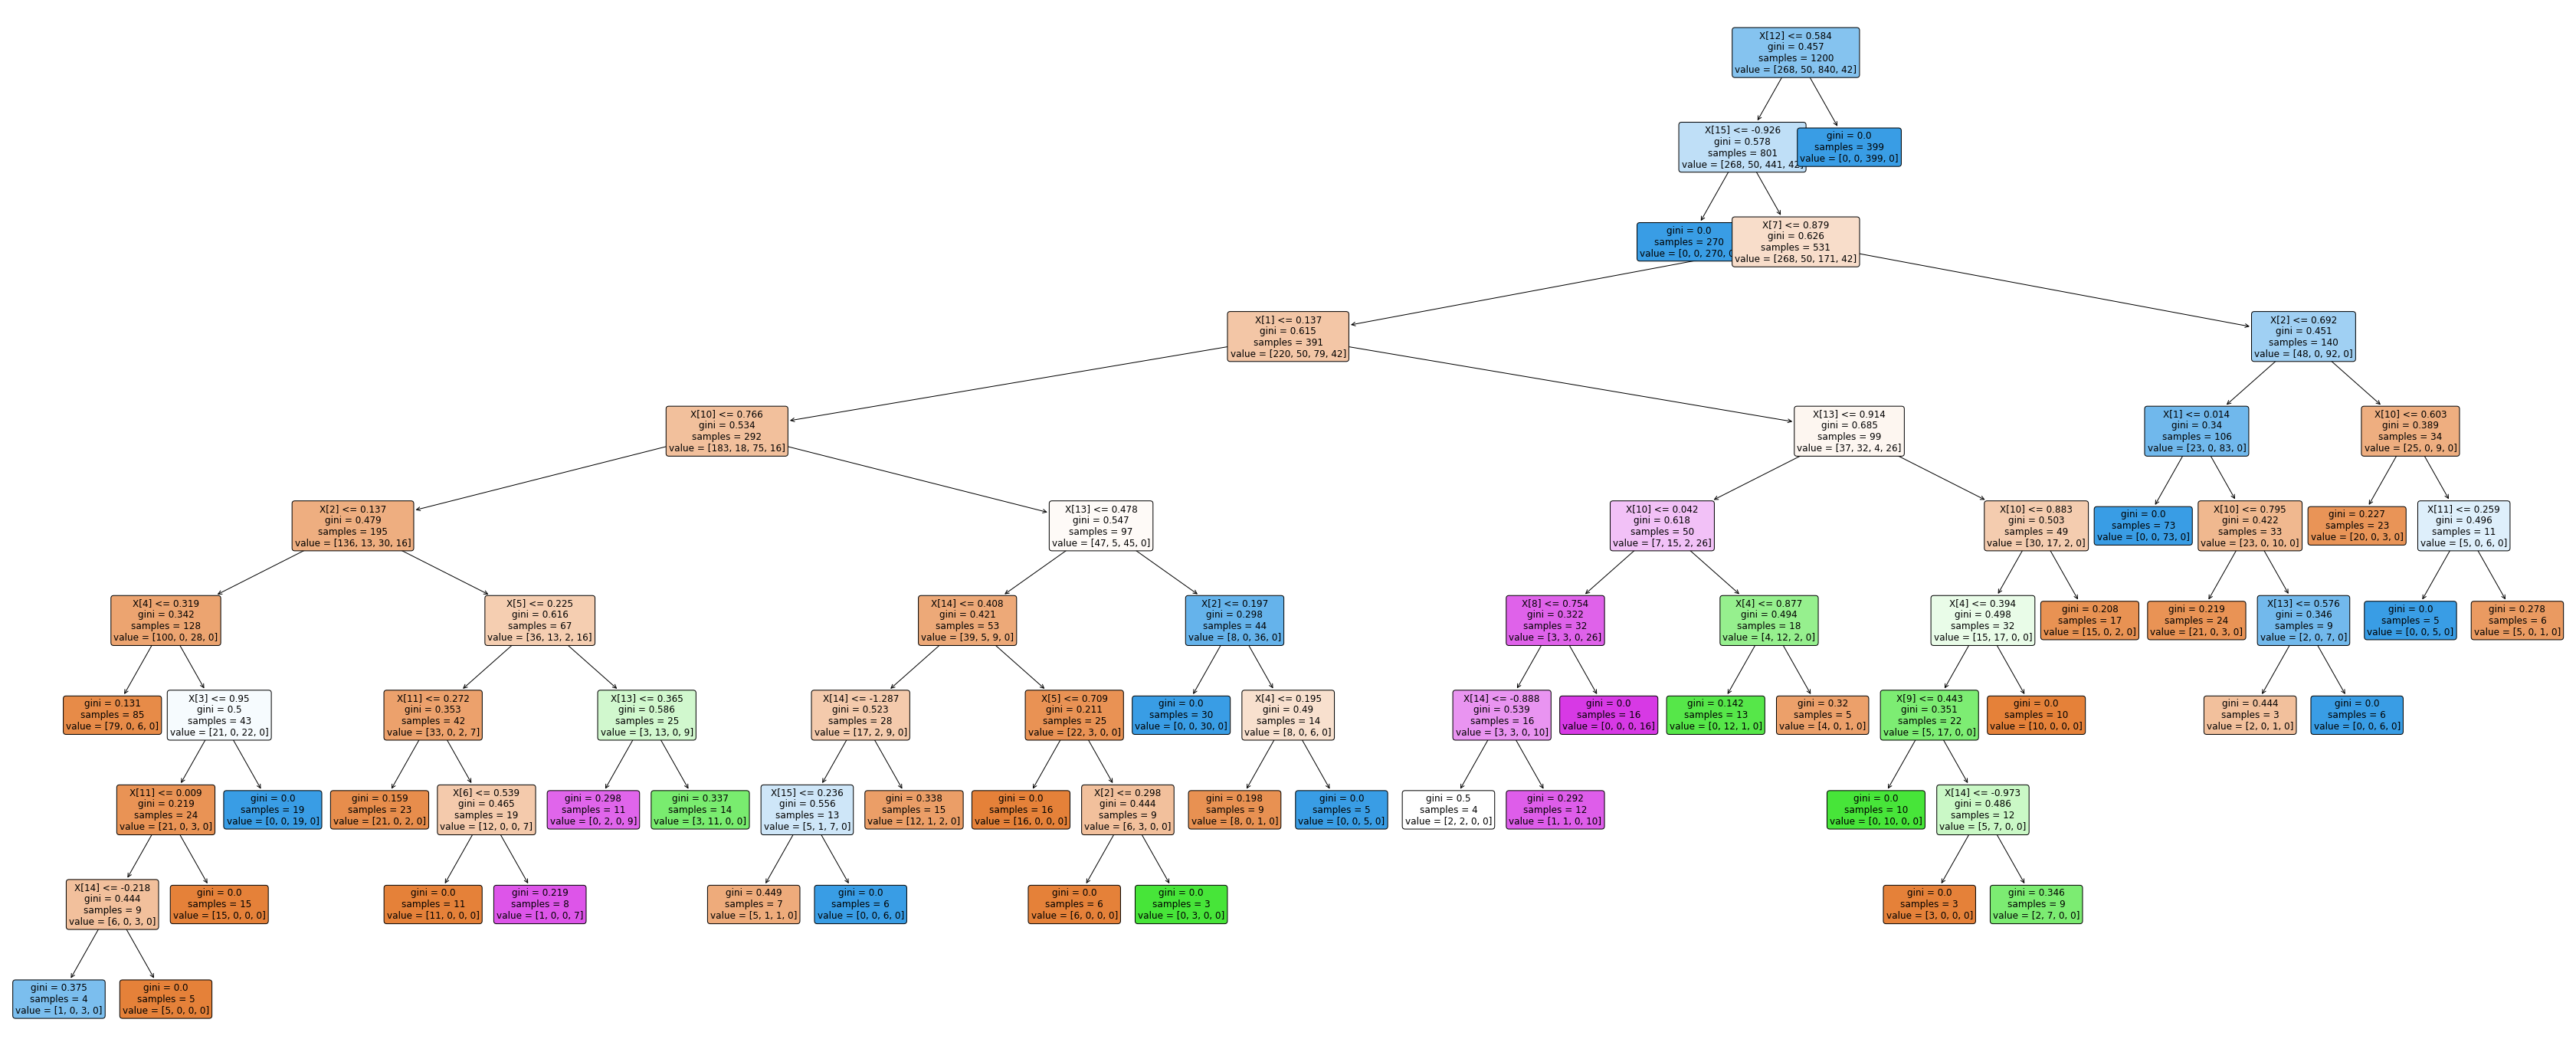

In [ ]:
from sklearn import tree
plt.figure(figsize=(60,25))
a= tree.plot_tree(dtc,
                  filled=True,

                  rounded=True,
                  fontsize=12)
plt.show()

## Que 19

Take RandomForestClassifier (random state to be 32) with GridSearchCV to tune the number of decision trees with training set. The number of trees in forest can range from 10 to 15 (both inclusive). Mark the number of decision trees that will produce the best score on the training data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#?RandomForestClassifier
pgrd = {"n_estimators":[10,11,12,13,14,15]}
rfc= RandomForestClassifier(random_state=32)
gcvrf = GridSearchCV(rfc,param_grid=pgrd)
gcvrf.fit(xtrain,ytrain)
print(gcvrf.best_params_,gcvrf.best_score_)


{'n_estimators': 13} 0.9566666666666667


## Que 20

Train a separate BaggingClassifier on training set with each one of the following as base estimator: support vector classifier (SVC), LogisticRegression, KNeighborsClassifier and DecisionTreeClassifier. Measure accuracy score on test set with each of these bagging classifiers. Which base estimator yields the highest accuracy score on test data?

Take random_state as 32 and n_estimators value as 15 for BaggingClassifier with each base estimator.
Take random_state as 32 individually for each of the following: support vector classifier(SVC), DecisionTreeClassifier and LogisticRegression.

In [ ]:
from sklearn.ensemble import BaggingClassifier
#?BaggingClassifier
clf1= SVC(random_state=32)
clf2=LogisticRegression(random_state=32)
clf3=KNeighborsClassifier()
clf4=DecisionTreeClassifier(random_state=32)
#baseest=[('svc',clf1),('log',clf2),('knn',clf3),('dtc',clf4)]
clflist=[clf1,clf2,clf3,clf4]
for item in clflist:
  bgclf =BaggingClassifier(item,random_state=32,n_estimators=15)
  bgclf.fit(xtrain,ytrain)
  scr= bgclf.score(xtest,ytest)
  print(item,scr)


SVC(random_state=32) 0.9833333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=32) 0.8733333333333333
KNeighborsClassifier() 0.95
DecisionTreeClassifier(random_state=32) 0.9866666666666667
